# Building CNN - Convolutional Neural Network

###Project Fashion-Classification - End to End

Train Convolutional Neural Network on 60,000 Fashion-MNIST Images (data in NP array)

Test Convolutional Neural Network on 10,000 Fashion-MNIST Images (data in NP array)

## Import Libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras # to build Neural Network

## Load Data

In [30]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data() # load dataset from  keras

In [31]:
# Print shape of Data

X_train.shape, y_train.shape, "******", X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

In [33]:
X_train[0] # image data in 2d numpy array shape 28x28 pixel

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [34]:
y_train[0]

9

In [35]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

## Show image

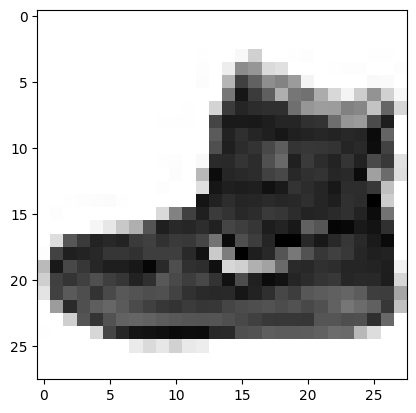

In [36]:
plt.imshow(X_train[0], cmap='Greys')

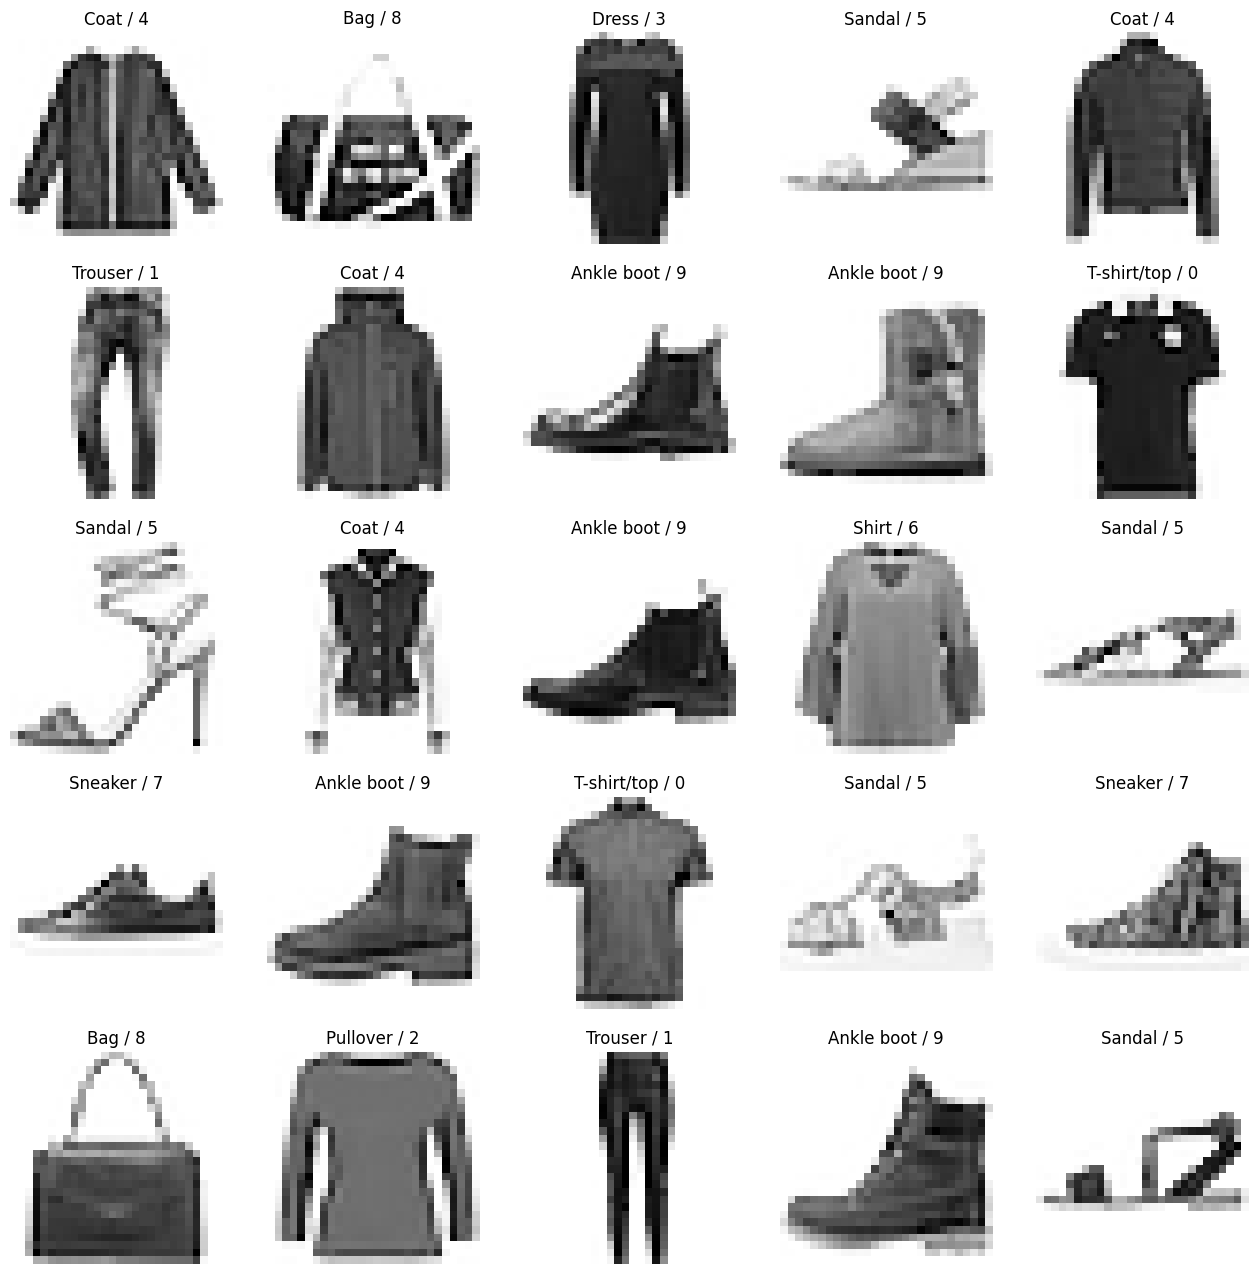

In [37]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))



## Change Dimention

In [38]:
X_train.shape

(60000, 28, 28)

In [39]:
X_train.ndim

3

In [40]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)


In [41]:
X_train.ndim

4

## Feature Scaling

In [42]:
X_train = X_train/255
X_test = X_test/255

## Split Dataset

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [45]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

# Convolutional Neural Network - Model Building

In [46]:
#Building CNN model
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [48]:
cnn_model.summary() # get the summary of model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [50]:
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
# train cnn model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10
94/94 [==============================] - 29s 291ms/step - loss: 0.6404 - accuracy: 0.7830 - val_loss: 0.4470 - val_accuracy: 0.8417
Epoch 2/10
94/94 [==============================] - 24s 260ms/step - loss: 0.3975 - accuracy: 0.8591 - val_loss: 0.3824 - val_accuracy: 0.8677
Epoch 3/10
94/94 [==============================] - 25s 269ms/step - loss: 0.3442 - accuracy: 0.8791 - val_loss: 0.3500 - val_accuracy: 0.8781
Epoch 4/10
94/94 [==============================] - 25s 264ms/step - loss: 0.3153 - accuracy: 0.8902 - val_loss: 0.3258 - val_accuracy: 0.8864
Epoch 5/10
94/94 [==============================] - 24s 258ms/step - loss: 0.2942 - accuracy: 0.8975 - val_loss: 0.3153 - val_accuracy: 0.8927
Epoch 6/10
94/94 [==============================] - 25s 260ms/step - loss: 0.2755 - accuracy: 0.9040 - val_loss: 0.3039 - val_accuracy: 0.8935
Epoch 7/10
94/94 [==============================] - 24s 251ms/step - loss: 0.2609 - accuracy: 0.9095 - val_loss: 0.2893 - val_accuracy: 0.9000

# Test the Model

In [52]:
y_pred = cnn_model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 2s 6ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.09, 0.03, 0.02]], dtype=float32)

In [53]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [54]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.2815 - accuracy: 0.8992


[0.2814815640449524, 0.8992000222206116]

# Visualize output

In [57]:
"""plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')"""

"plt.figure(figsize=(16,16))\n\nj=1\nfor i in np.random.randint(0, 1000,25):\n  plt.subplot(5,5, j); j+=1\n  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')\n  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))\n  plt.axis('off')"

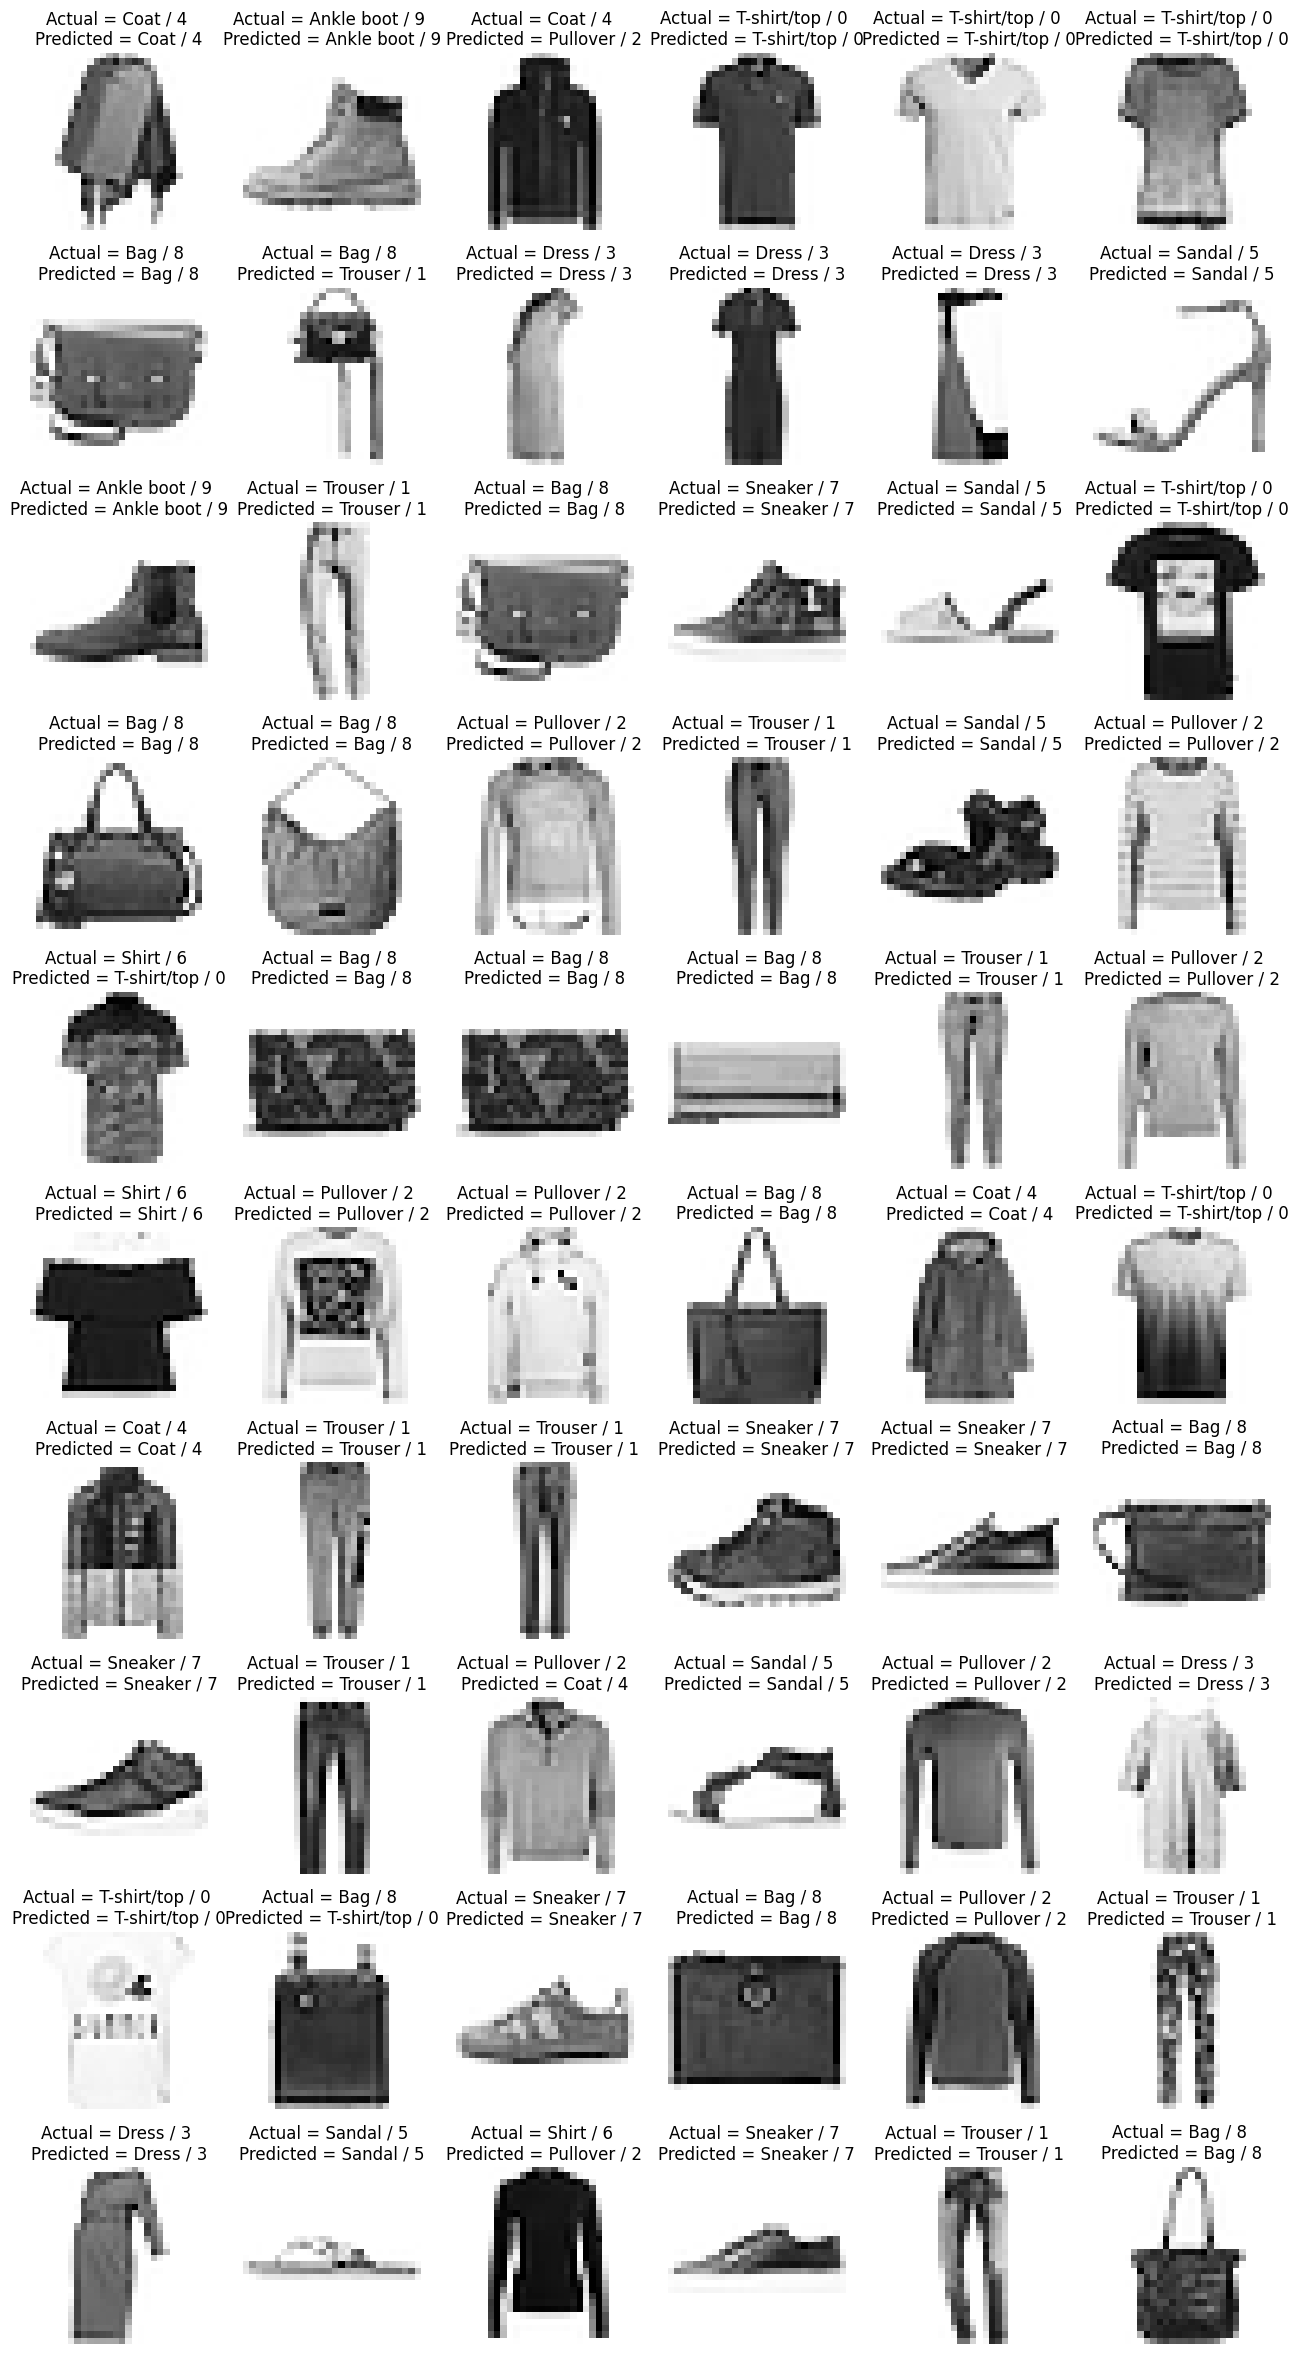

In [58]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

## Confusion Matrix

<Axes: >

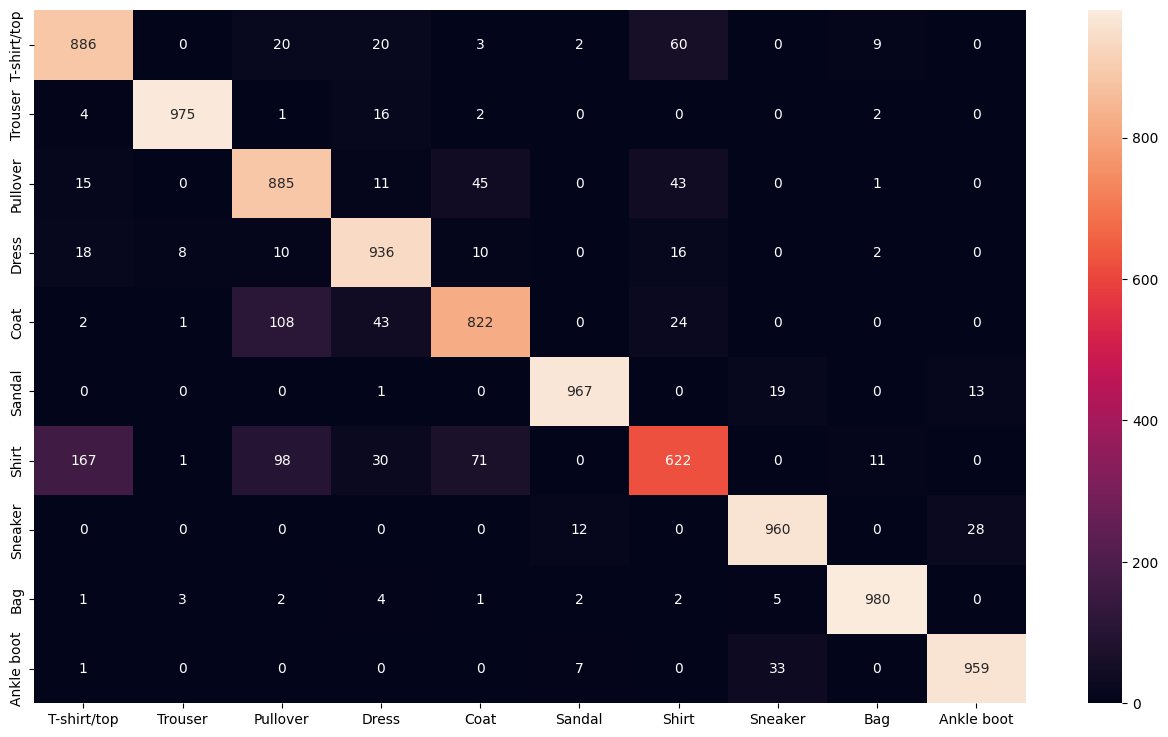

In [59]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [60]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.89      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.79      0.89      0.83      1000
       Dress       0.88      0.94      0.91      1000
        Coat       0.86      0.82      0.84      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.81      0.62      0.70      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Save Model

In [63]:
cnn_model.save('f://fashion_mnist_cnn_model.h5') # Save model

In [62]:
# Load model
fashion_mnist_cnn_model = keras.models.load_model('fashion_mnist_cnn_model.h5')

In [64]:
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample

1/1 [==============================] - 0s 106ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98]],
      dtype=float32)

In [65]:
np.argmax(Y_pred_sample[0])

9

In [66]:
y_test[0]

9

# Convolutional Neural Network - Building Complex Model

In [67]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [68]:
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [69]:
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/20
94/94 [==============================] - 34s 344ms/step - loss: 1.0378 - accuracy: 0.6045 - val_loss: 0.5947 - val_accuracy: 0.7684
Epoch 2/20
94/94 [==============================] - 32s 337ms/step - loss: 0.5766 - accuracy: 0.7828 - val_loss: 0.4945 - val_accuracy: 0.8127
Epoch 3/20
94/94 [==============================] - 32s 335ms/step - loss: 0.4720 - accuracy: 0.8258 - val_loss: 0.4185 - val_accuracy: 0.8466
Epoch 4/20
94/94 [==============================] - 30s 319ms/step - loss: 0.4204 - accuracy: 0.8446 - val_loss: 0.3824 - val_accuracy: 0.8611
Epoch 5/20
94/94 [==============================] - 31s 334ms/step - loss: 0.3857 - accuracy: 0.8601 - val_loss: 0.3596 - val_accuracy: 0.8652
Epoch 6/20
94/94 [==============================] - 31s 328ms/step - loss: 0.3557 - accuracy: 0.8691 - val_loss: 0.3363 - val_accuracy: 0.8758
Epoch 7/20
94/94 [==============================] - 31s 326ms/step - loss: 0.3357 - accuracy: 0.8767 - val_loss: 0.3308 - val_accuracy: 0.8801

In [70]:
cnn_model2.save('fashion_mnist_cnn_model2.h5')

## very complex model

In [71]:
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [72]:
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])